In [10]:
#loading the libraries needed
import numpy as np     
import nashpy as nash
import axelrod as axl
import matplotlib.pyplot as plt
%matplotlib inline

#defining the game of Prisoner's Dilemma
A = np.array([[3, 0], [5, 1]])
B = np.array([[3, 5], [0, 1]])
Prisoners_Dilemma = nash.Game(A, B)

equil = Prisoners_Dilemma.support_enumeration()
list(equil)

[(array([0., 1.]), array([0., 1.]))]

In [11]:
filterset  = {
    'long_run_time': False,
    'manipulates_state': False,
    'manipulates_source': False,
    'inspects_source': False
}

strategies = axl.filtered_strategies(filterset)
strategies.remove(axl.Defector)
#print([strategies[strategy] for strategy in range(10)])
#[x for x in strategies if x == axl.Defector]

C:\Users\sophi\Anaconda3_1\lib\site-packages\dask\dataframe\utils.py:411: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=levels, labels=labels, names=idx.names)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


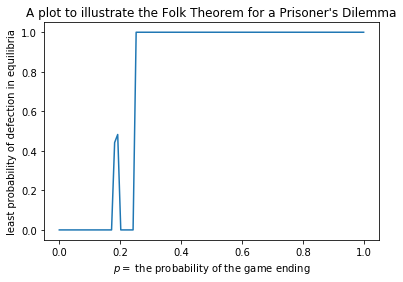

In [29]:
repeats = 100
epsilon = 0.001

probs = np.linspace(epsilon, 1 - epsilon, 100) #obtaining 500 points for the prob. of a game p, 0 < p < 1
least_prob_of_defect_equilibria = [] #creating an empty list

for p in probs:
    axl.seed(0) #setting the seed so we obtain the same results
    players = [axl.Cooperator(), axl.TitForTat(), axl.Random(), axl.Defector()] #strategies used in the tournament
    tournament = axl.Tournament(players, prob_end=p, repetitions=repeats)  #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
    results = tournament.play(progress_bar=False) #play the tournament
    payoff_matrix = np.array(results.payoff_matrix) #we wish to obtain the mean payoffs for each player in a matrix
    game = nash.Game(payoff_matrix, payoff_matrix.transpose()) #creating a game from the matrix obtained
    least_prob_of_defect_equilibria.append(
        min([sigma_1[-1] for sigma_1, _ in game.support_enumeration()])
    )  #we wish to obtain a list of the smallest probability of defection in any equilibria in order to plot.

graph1 = plt.figure()
plt.xlabel("$p =$ the probability of the game ending" )
plt.ylabel("least probability of defection in equilibria")
plt.title("A plot to illustrate the Folk Theorem for a Prisoner's Dilemma")
plt.plot(probs, least_prob_of_defect_equilibria)
plt.show()

graph1.savefig("Folk Theorem Graph.pdf")

In [12]:
import random
opponents = random.sample(strategies, 3)
list_of_players = [opponents[0](), opponents[1](), opponents[2](), axl.Defector()]
print(opponents)

repeats = 100
epsilon = 0.001

probs = np.linspace(epsilon, 1 - epsilon, 100) #obtaining 500 points for the prob. of a game p, 0 < p < 1
least_prob_of_defect_equilibria2 = [] #creating an empty list

for p in probs:
    axl.seed(0) #setting the seed so we obtain the same results
    players2 = list_of_players
    tournament2 = axl.Tournament(players2, prob_end=p, repetitions=repeats)  #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
    results2 = tournament2.play(progress_bar=False) #play the tournament
    payoff_matrix2 = np.array(results2.payoff_matrix) #we wish to obtain the mean payoffs for each player in a matrix
    game2 = nash.Game(payoff_matrix2, payoff_matrix2.transpose()) #creating a game from the matrix obtained
    least_prob_of_defect_equilibria2.append(
        min([sigma_1[-1] for sigma_1, _ in game2.support_enumeration()])
    )  #we wish to obtain a list of the smallest probability of defection in any equilibria in order to plot.

graph2 = plt.figure()
plt.xlabel("$p =$ the probability of the game ending" )
plt.ylabel("least probability of defection in equilibria")
plt.title("A plot to illustrate the Folk Theorem for a Prisoner's Dilemma")
plt.plot(probs, least_prob_of_defect_equilibria2)
plt.show()

graph2.savefig("Folk Theorem Graph 2.pdf")

[<class 'axelrod.strategies.axelrod_first.TidemanAndChieruzzi'>, <class 'axelrod.strategies.meta.MetaWinnerMemoryOne'>, <class 'axelrod.strategies.finite_state_machines.Thumper'>]


KeyboardInterrupt: 

[<class 'axelrod.strategies.lookerup.Winner21'>, <class 'axelrod.strategies.titfortat.AntiTitForTat'>, <class 'axelrod.strategies.titfortat.OmegaTFT'>]


C:\Users\sophi\Anaconda3_1\lib\site-packages\dask\dataframe\utils.py:411: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=levels, labels=labels, names=idx.names)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (6) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates

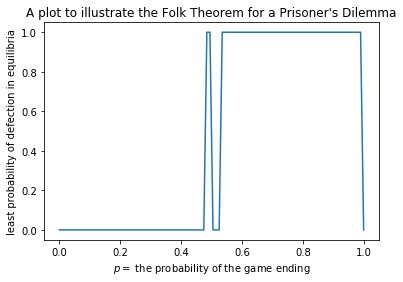

In [13]:
import random
opponents = random.sample(strategies, 3)
list_of_players = [opponents[0](), opponents[1](), opponents[2](), axl.Defector()]
print(opponents)

repeats = 100
epsilon = 0.001

probs = np.linspace(epsilon, 1 - epsilon, 100) #obtaining 500 points for the prob. of a game p, 0 < p < 1
least_prob_of_defect_equilibria3 = [] #creating an empty list

for p in probs:
    axl.seed(0) #setting the seed so we obtain the same results
    players3 = list_of_players
    tournament3 = axl.Tournament(players3, prob_end=p, repetitions=repeats)  #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
    results3 = tournament3.play(progress_bar=False) #play the tournament
    payoff_matrix3 = np.array(results3.payoff_matrix) #we wish to obtain the mean payoffs for each player in a matrix
    game3 = nash.Game(payoff_matrix3, payoff_matrix3.transpose()) #creating a game from the matrix obtained
    least_prob_of_defect_equilibria3.append(
        min([sigma_1[-1] for sigma_1, _ in game3.support_enumeration()])
    )  #we wish to obtain a list of the smallest probability of defection in any equilibria in order to plot.

graph3 = plt.figure()
plt.xlabel("$p =$ the probability of the game ending" )
plt.ylabel("least probability of defection in equilibria")
plt.title("A plot to illustrate the Folk Theorem for a Prisoner's Dilemma")
plt.plot(probs, least_prob_of_defect_equilibria3)
plt.show()

graph3.savefig("Folk Theorem Graph 3.pdf")

[<class 'axelrod.strategies.axelrod_second.Leyvraz'>, <class 'axelrod.strategies.worse_and_worse.WorseAndWorse3'>, <class 'axelrod.strategies.sequence_player.ThueMorseInverse'>]


C:\Users\sophi\Anaconda3_1\lib\site-packages\dask\dataframe\utils.py:411: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=levels, labels=labels, names=idx.names)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (6) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3_1\lib\site-packages\nashpy\algorithms\support_enumeration.py:179: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates

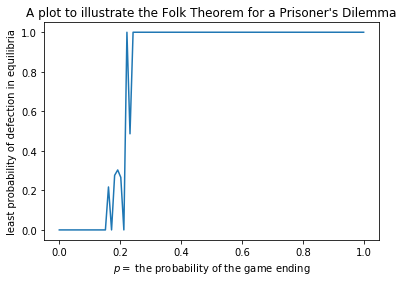

In [15]:
import random
opponents = random.sample(strategies, 3)
list_of_players = [opponents[0](), opponents[1](), opponents[2](), axl.Defector()]
print(opponents)

repeats = 100
epsilon = 0.001

probs = np.linspace(epsilon, 1 - epsilon, 100) #obtaining 500 points for the prob. of a game p, 0 < p < 1
least_prob_of_defect_equilibria4 = [] #creating an empty list

for p in probs:
    axl.seed(0) #setting the seed so we obtain the same results
    players4 = list_of_players
    tournament4 = axl.Tournament(players4, prob_end=p, repetitions=repeats)  #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
    results4 = tournament4.play(progress_bar=False) #play the tournament
    payoff_matrix4 = np.array(results4.payoff_matrix) #we wish to obtain the mean payoffs for each player in a matrix
    game4 = nash.Game(payoff_matrix4, payoff_matrix4.transpose()) #creating a game from the matrix obtained
    least_prob_of_defect_equilibria4.append(
        min([sigma_1[-1] for sigma_1, _ in game4.support_enumeration()])
    )  #we wish to obtain a list of the smallest probability of defection in any equilibria in order to plot.

graph4 = plt.figure()
plt.xlabel("$p =$ the probability of the game ending" )
plt.ylabel("least probability of defection in equilibria")
plt.title("A plot to illustrate the Folk Theorem for a Prisoner's Dilemma")
plt.plot(probs, least_prob_of_defect_equilibria4)
plt.show()

graph4.savefig("Folk Theorem Graph 4.pdf")